# House Price Prediction

## Load the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True) # Remove null values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Data Exploration

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = data.drop(["median_house_value"], axis=1) # Data without the column whose values we want to predict
y = data["median_house_value"] # The column whose values we want to predict

In [9]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [10]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # Split the data into training and testing datasets

In [12]:
train_data = X_train.join(y_train)

In [13]:
train_data # Training related data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11670,-118.01,33.84,28.0,4097.0,838.0,2112.0,803.0,4.5000,<1H OCEAN,202100.0
5293,-118.43,34.07,38.0,3251.0,656.0,1251.0,593.0,7.7382,<1H OCEAN,500001.0
3564,-118.56,34.23,36.0,2406.0,432.0,1242.0,454.0,4.6944,<1H OCEAN,221800.0
11472,-118.00,33.71,19.0,4808.0,1029.0,2422.0,971.0,4.0121,<1H OCEAN,279700.0
18857,-122.27,41.20,52.0,4513.0,985.0,1926.0,815.0,1.5923,INLAND,56000.0
...,...,...,...,...,...,...,...,...,...,...
16372,-121.30,38.03,10.0,1409.0,248.0,782.0,222.0,4.0227,INLAND,107700.0
5749,-118.27,34.16,45.0,1865.0,360.0,973.0,349.0,3.6587,<1H OCEAN,321200.0
8750,-118.37,33.82,36.0,2463.0,447.0,1125.0,424.0,6.0176,<1H OCEAN,352700.0
2337,-119.67,36.83,4.0,2145.0,334.0,1024.0,308.0,5.0864,INLAND,113700.0


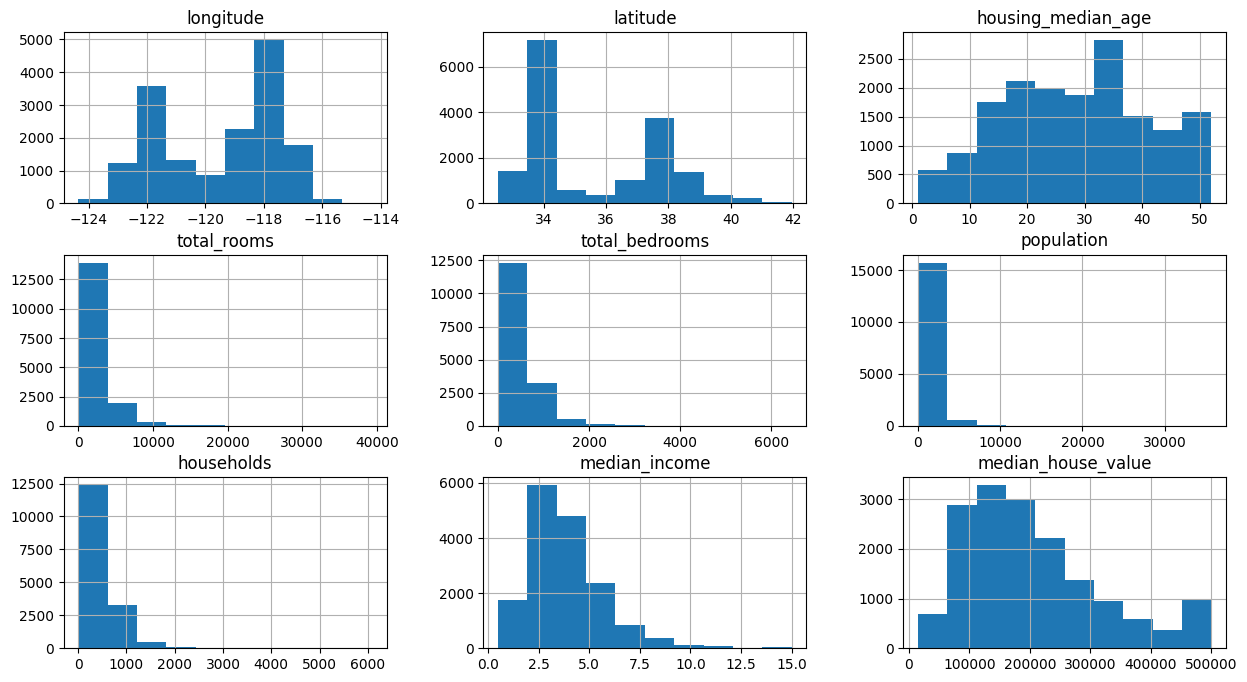

In [14]:
train_data.hist(figsize=(15, 8)); # We notice 4 features look skewed

In [15]:
train_data.drop(["ocean_proximity"], axis=1).corr() # Looking for correlation between the data; dropped a troublesome column, temporarily

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924733,-0.110549,0.048445,0.071042,0.100233,0.057757,-0.015694,-0.047028
latitude,-0.924733,1.000000,0.011002,-0.037077,-0.066117,-0.105875,-0.070884,-0.079661,-0.143495
housing_median_age,-0.110549,0.011002,1.000000,-0.361779,-0.323535,-0.296811,-0.305926,-0.115059,0.111785
total_rooms,0.048445,-0.037077,-0.361779,1.000000,0.932615,0.857320,0.920048,0.199487,0.131724
total_bedrooms,0.071042,-0.066117,-0.323535,0.932615,1.000000,0.877558,0.979409,-0.002038,0.051160
population,0.100233,-0.105875,-0.296811,0.857320,0.877558,1.000000,0.907464,0.007977,-0.025991
households,0.057757,-0.070884,-0.305926,0.920048,0.979409,0.907464,1.000000,0.017908,0.066082
median_income,-0.015694,-0.079661,-0.115059,0.199487,-0.002038,0.007977,0.017908,1.000000,0.690360
median_house_value,-0.047028,-0.143495,0.111785,0.131724,0.051160,-0.025991,0.066082,0.690360,1.000000


<Axes: >

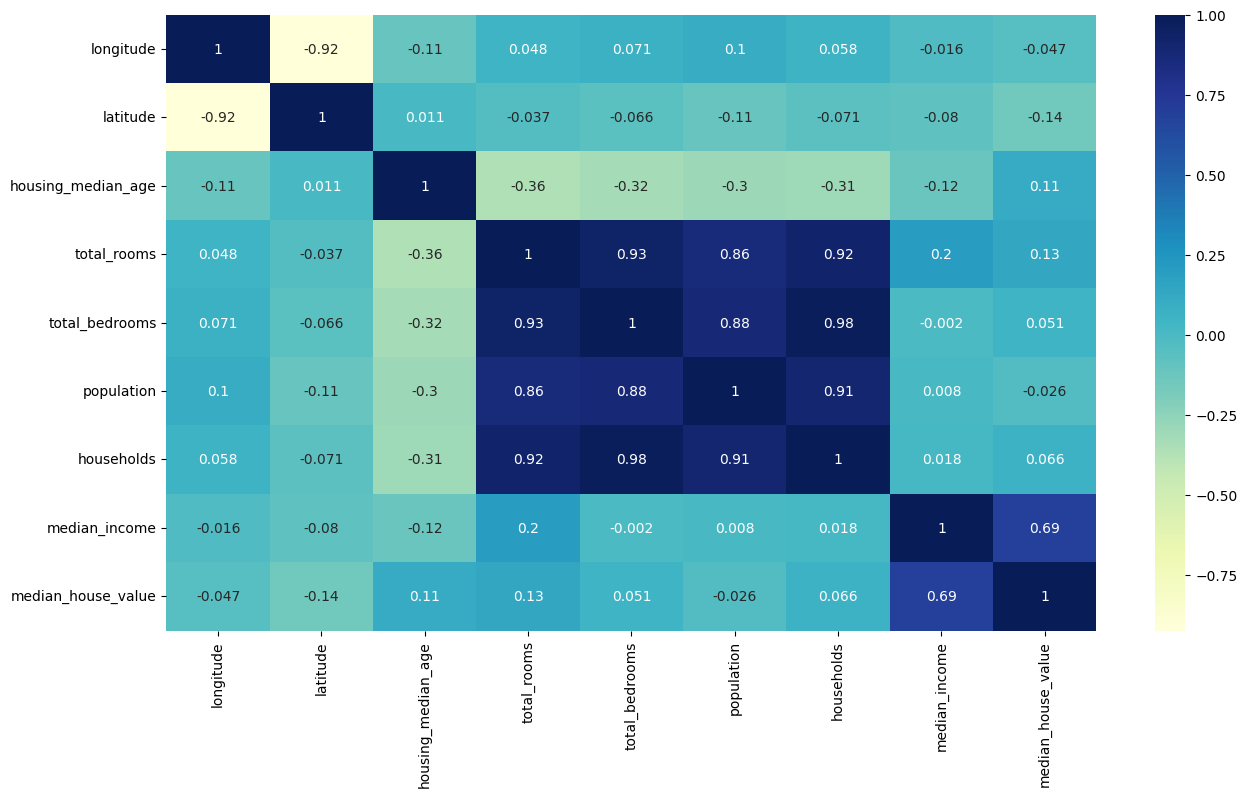

In [16]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.drop(["ocean_proximity"], axis=1).corr(), annot=True, cmap="YlGnBu") # Same as before but pretty

## Data Preprocessing

In [17]:
# We take the skewed features and find their logarithm
train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["population"] = np.log(train_data["population"] + 1)
train_data["households"] = np.log(train_data["total_rooms"] + 1)

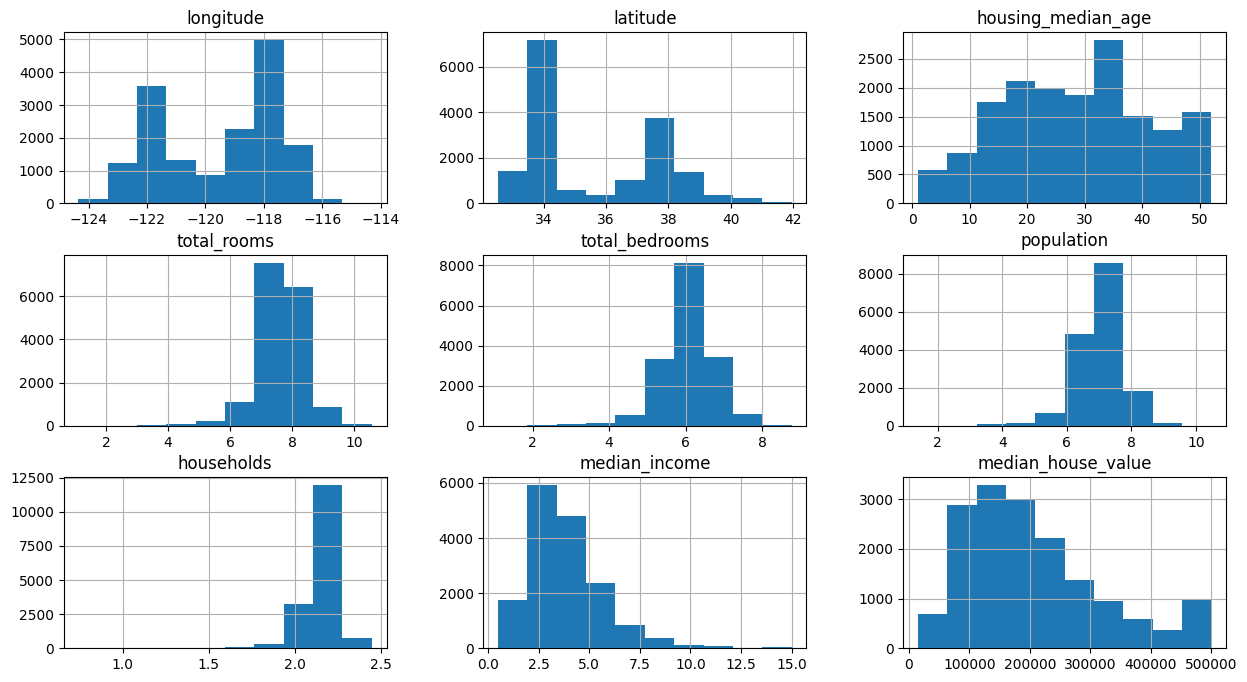

In [18]:
# We notice they now better resemble a Gaussian bell curve
train_data.hist(figsize=(15, 8));

In [19]:
# We now attempt to better represent the ocean_proximity feature
train_data.ocean_proximity.value_counts() # We will turn each value into its own feature

ocean_proximity
<1H OCEAN     7198
INLAND        5241
NEAR OCEAN    2084
NEAR BAY      1819
ISLAND           4
Name: count, dtype: int64

In [20]:
pd.get_dummies(train_data.ocean_proximity) # We have turned each value into its own feature

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11670,True,False,False,False,False
5293,True,False,False,False,False
3564,True,False,False,False,False
11472,True,False,False,False,False
18857,False,True,False,False,False
...,...,...,...,...,...
16372,False,True,False,False,False
5749,True,False,False,False,False
8750,True,False,False,False,False
2337,False,True,False,False,False


In [21]:
train_data.join(pd.get_dummies(train_data.ocean_proximity)) # We append the new features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11670,-118.01,33.84,28.0,8.318254,6.732211,7.655864,2.231975,4.5000,<1H OCEAN,202100.0,True,False,False,False,False
5293,-118.43,34.07,38.0,8.087025,6.487684,7.132498,2.206848,7.7382,<1H OCEAN,500001.0,True,False,False,False,False
3564,-118.56,34.23,36.0,7.786136,6.070738,7.125283,2.173175,4.6944,<1H OCEAN,221800.0,True,False,False,False,False
11472,-118.00,33.71,19.0,8.478244,6.937314,7.792762,2.248999,4.0121,<1H OCEAN,279700.0,True,False,False,False,False
18857,-122.27,41.20,52.0,8.414939,6.893656,7.563720,2.242298,1.5923,INLAND,56000.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16372,-121.30,38.03,10.0,7.251345,5.517453,6.663133,2.110376,4.0227,INLAND,107700.0,False,True,False,False,False
5749,-118.27,34.16,45.0,7.531552,5.888878,6.881411,2.143771,3.6587,<1H OCEAN,321200.0,True,False,False,False,False
8750,-118.37,33.82,36.0,7.809541,6.104793,7.026427,2.175835,6.0176,<1H OCEAN,352700.0,True,False,False,False,False
2337,-119.67,36.83,4.0,7.671361,5.814131,6.932448,2.160026,5.0864,INLAND,113700.0,False,True,False,False,False


In [22]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"], axis=1) # ocean_proximity is now obsolete

In [23]:
train_data # Verify how the data looks after the modifications

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11670,-118.01,33.84,28.0,8.318254,6.732211,7.655864,2.231975,4.5000,202100.0,True,False,False,False,False
5293,-118.43,34.07,38.0,8.087025,6.487684,7.132498,2.206848,7.7382,500001.0,True,False,False,False,False
3564,-118.56,34.23,36.0,7.786136,6.070738,7.125283,2.173175,4.6944,221800.0,True,False,False,False,False
11472,-118.00,33.71,19.0,8.478244,6.937314,7.792762,2.248999,4.0121,279700.0,True,False,False,False,False
18857,-122.27,41.20,52.0,8.414939,6.893656,7.563720,2.242298,1.5923,56000.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16372,-121.30,38.03,10.0,7.251345,5.517453,6.663133,2.110376,4.0227,107700.0,False,True,False,False,False
5749,-118.27,34.16,45.0,7.531552,5.888878,6.881411,2.143771,3.6587,321200.0,True,False,False,False,False
8750,-118.37,33.82,36.0,7.809541,6.104793,7.026427,2.175835,6.0176,352700.0,True,False,False,False,False
2337,-119.67,36.83,4.0,7.671361,5.814131,6.932448,2.160026,5.0864,113700.0,False,True,False,False,False


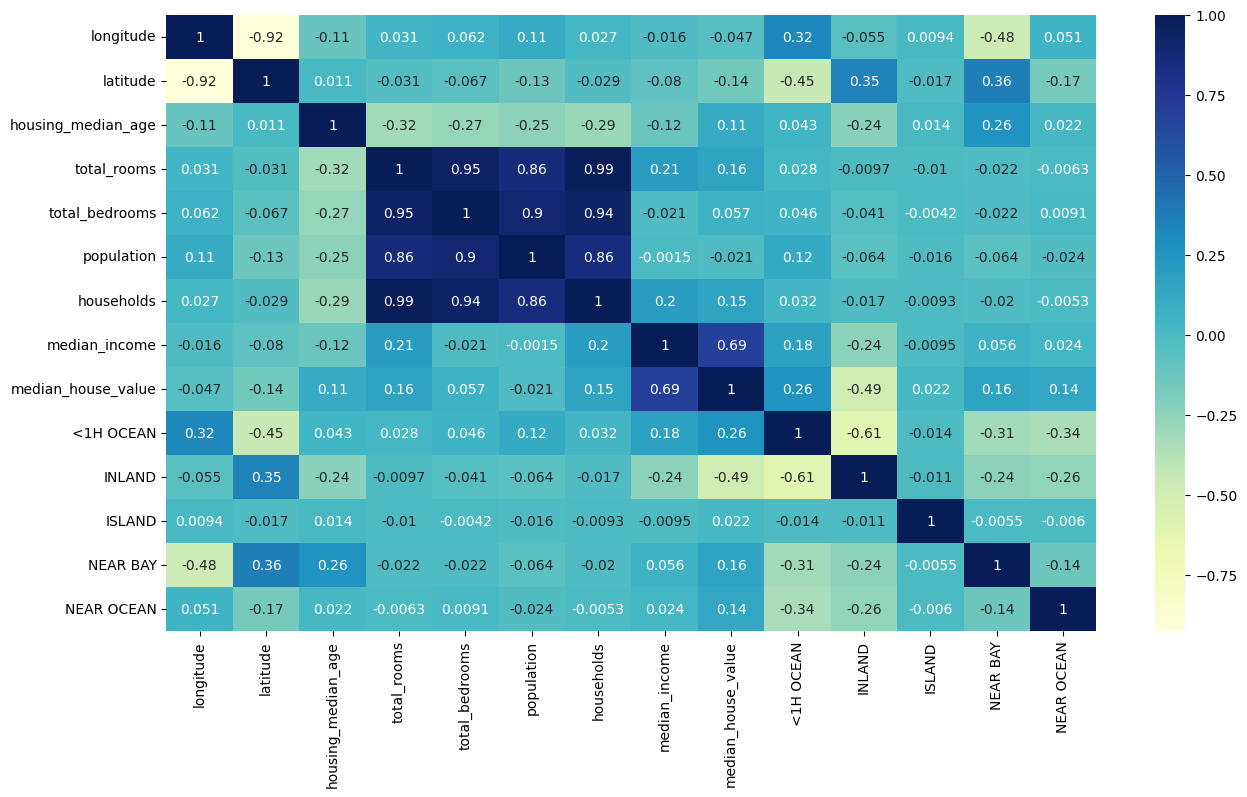

In [25]:
plt.figure(figsize=(15, 8)) # We can better observe the correlation between proximity to water and house price
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu");

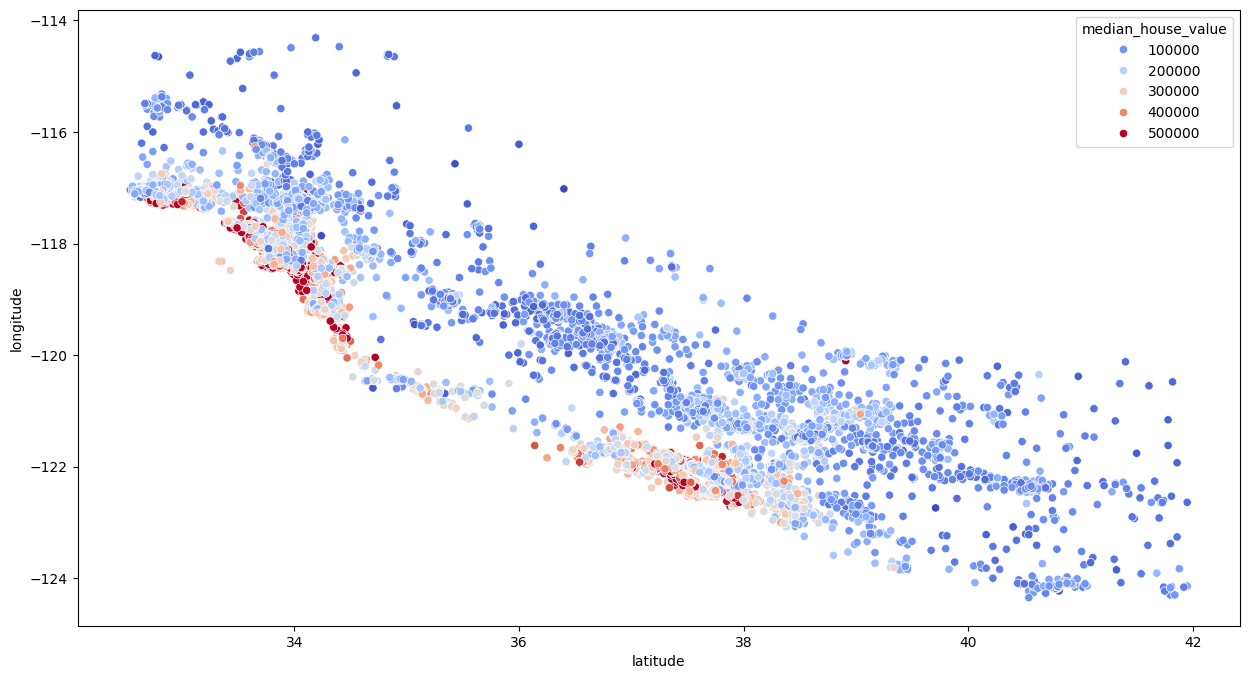

In [27]:
plt.figure(figsize=(15, 8)) # Interestingly, using a scatterplot allows us to notice where the coast would be situated on the map of California, as the prices increase near the ocean
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm");

## Feature Engineering